# Математическая статистика, ДЗ 10

### Куйбида Всеволод Иванович БПМИ214

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, ttest_ind
import pandas as pd
import seaborn as sns

In [2]:
sns.set(style='darkgrid', palette='deep')

P.S. Требуемые для ДЗ файлы должны лежать в папке data/

# Задание 1

В 1878 году Чарльз Дарвин записал некоторые данные по высоте растений *Zea
mays*, чтобы определить, какое влияние оказывает перекрестное опыление или самоопыление на высоту *Zea mays*. Было проведено 15 экспериментов, в ходе которых одно перекрестно-опыленное и одно само-опыленное растения выращивались
в одном горшке, а затем измерялась их высота.

Данные представлены как набор из 15 пар $(Y_1, Z_1), . . . , (Y_{15}, Z_{15})$, где $Y_i$ и $Z_i$
– высота перекрестно-опыленного и само-опыленного растения в $i$ горшке соответственно. Данные могут быть найдены по ссылке https://disk.yandex.ru/d/FjKC9qXwUs7mTQ.

Ваша задача: проверить гипотезу $H0 : E[Z_i] = E[Y_i]$ (против альтернативы $H1 : E[Z_i] 6= E[Y_i]$) на уровне значимости $α = 0.05$.

In [3]:
B = 10000
ALPHA = 0.95

Далее используются обозначения из условия.

Пусть $Y_i, Z_i$ - с.в., относительно которых мы строим гипотезу, $X_i := Y_i - Z_i$.

Из условия мы знаем, что $X_i$ - выборка.

Проверяем следующую гипотезу:

- $H_0$: $\mathbb{E}Y_i = \mathbb{E}Z_i \Leftrightarrow \mathbb{E}X_i = 0$
- $H_1$: $\mathbb{E}Y_i \neq \mathbb{E}Z_i \Leftrightarrow \mathbb{E}X_i \neq 0$


### **1.1.1.** Откроем файл с данными:

In [4]:
plants = np.loadtxt(open("data/Darwin_data.csv", "rb"), delimiter=",", skiprows=1)

### **1.1.2.** Посмотрим на наши данные:

In [5]:
print(plants)

[[ 0.    23.5   17.375]
 [ 1.    12.    20.375]
 [ 2.    21.    20.   ]
 [ 3.    22.    20.   ]
 [ 4.    19.125 18.375]
 [ 5.    21.5   18.625]
 [ 6.    22.125 18.625]
 [ 7.    20.375 15.25 ]
 [ 8.    18.25  16.5  ]
 [ 9.    21.625 18.   ]
 [10.    23.25  16.25 ]
 [11.    32.    18.   ]
 [12.    22.125 12.75 ]
 [13.    23.    15.5  ]
 [14.    12.    18.   ]]


### **1.2.** Сделаем бутстрап для выборки $X_i$:

Сгенерируем $B$ выборок из $X$ с возвращением, построим для каждой из них оценку среднего. В полученной последовательности возьмём $\lfloor (1 - \gamma) / 2 \times B \rfloor$-квантиль как левый край и $n - \lfloor (1 - \gamma) / 2 \times B \rfloor$-квантиль как правый край.

In [6]:
bootstrapped = np.random.choice(plants[:, 1] - plants[:, 2], (plants.shape[0], B), replace=True)
means = np.sort(np.mean(bootstrapped, axis=0))
conf_interval = (means[int(((1 - ALPHA) / 2 * means.shape[0]) // 1)],
                       means[int(((1 + ALPHA) / 2 * means.shape[0]) // 1)])

In [7]:
print(f"Our {(1 - ALPHA):2f}-confidence interval is", conf_interval)

Our 0.050000-confidence interval is (0.6166666666666667, 6.016666666666667)


Видим, что 0 не лежит в 95%-ном доверительном интервале для $\mathbb{E}[X_i]$. Значит, отвергаем нулевую гипотезу на уровне значимости 0.05.

### **1.3.** Какой в этом биологический смысл?

Перекрёстно-опылённые и само-опылённые растения качественно различаются, т.е. тип опыления влияет на растение

# Задание 2

Вам представлены данные US National Health Inteview Survey за 1994 год с детальной информацией о 17870 работниках. Глобальная задача: исследовать зависимость между двумя неочевидными характеристиками: ростом и доходом.

In [8]:
ALPHA = 0.005

### **2.1.1.** Откроем файл с данными:

In [9]:
df_second = pd.read_excel("data/Earnings_and_Height.xlsx")

### **2.1.2.** Посмотрим на наши данные:

In [10]:
print(df_second)

       sex  age  mrd  educ  cworker  region  race      earnings  height  \
0        0   48    1    13        1       3     1  84054.750000      65   
1        0   41    6    12        1       2     1  14021.394531      65   
2        0   26    1    16        1       1     1  84054.750000      60   
3        0   37    1    16        1       2     1  84054.750000      67   
4        0   35    6    16        1       1     1  28560.386719      68   
...    ...  ...  ...   ...      ...     ...   ...           ...     ...   
17865    1   47    6    12        1       1     1  18168.841797      70   
17866    1   44    1    12        2       4     1  84054.750000      74   
17867    1   30    1    12        1       3     1  16081.587891      65   
17868    1   46    3    12        4       4     1  84054.750000      68   
17869    1   37    4     9        6       2     1  12954.765625      68   

       weight  occupation  
0         133           1  
1         155           1  
2         108  

### **2.1.3.** Построим гистограммы (распределения) для столбцов, соответствующих росту и доходу:

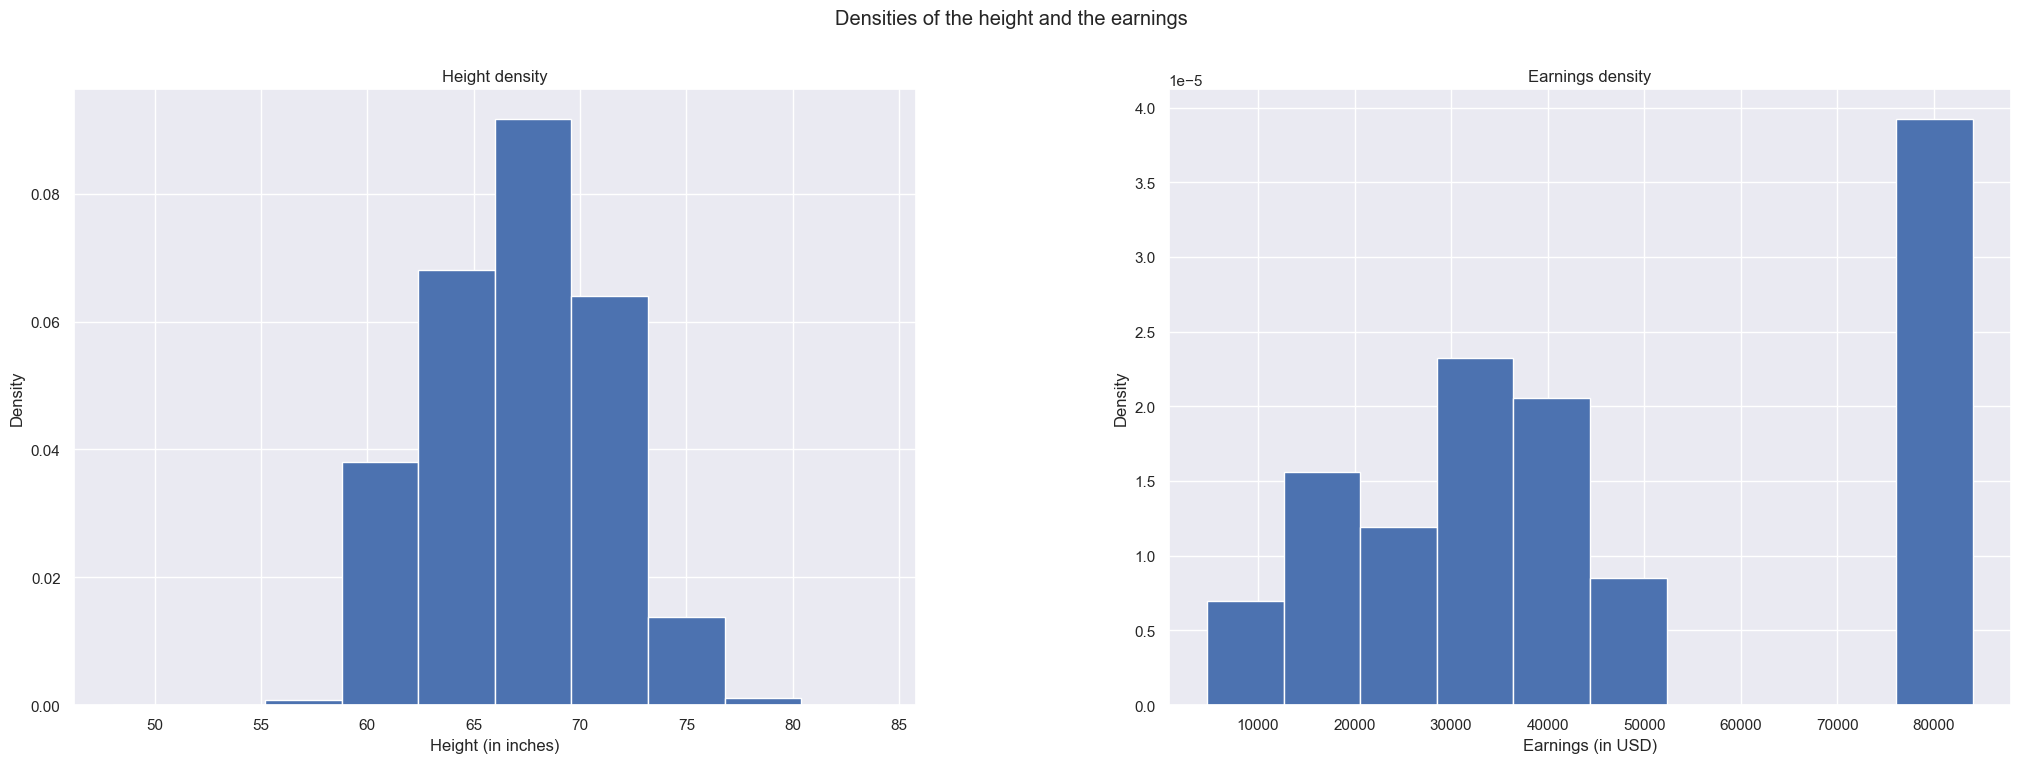

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(25, 8))
df_second.hist(["height", "earnings"], figsize=(15, 5), density=True, ax=axes)
fig.suptitle("Densities of the height and the earnings")
axes[0].set(title="Height density", xlabel='Height (in inches)', ylabel='Density')
axes[1].set(title="Earnings density", xlabel='Earnings (in USD)', ylabel='Density')
plt.show()

Распределение роста людей как будто бы распределено нормально, как и распределение доходов (без учёта выбросов).

### **2.2.** Проверим гипотезу:

Пусть $(X_i, Y_i)$ - выборка из двумерных векторов, где $X_i$ - рост человека, а $Y_i$ - его заработок.

Проверим гипотезу:
- $H_0: X_i, Y_i \text{ независимы}$
- $H_1: X_i, Y_i \text{ зависимы}$

на уровне значимости $\alpha = 0.05$

#### Проверка гипотезы:

Для начала скопируем наш DataFrame в другое место, чтобы как-то его изменять:

In [12]:
df_1 = df_second.copy()

Дискретизируем наше распределение: для роста сделаем бины вида $[20(i - 1), 20i)$, где $i \in \mathbb{N}$, для заработка - $[20000(i - 1), 20000i)$, где $i \in \mathbb{N}$.

In [13]:
df_1['earnings'] = (df_1['earnings'] // 20000) * 20000
df_1['height'] = (df_1['height'] // 10) * 10

Построим таблицу сопряжённости для нашего распределения (нас интересует только столбцы earnings и height) и посмотрим на неё:

In [14]:
idk = pd.crosstab(index=df_1['earnings'], columns=df_1['height'])
print(idk)

height    40  50    60    70  80
earnings                        
0.0        2  43  2149   585   0
20000.0    1  89  4950  1842   3
40000.0    0  37  1800   803   0
80000.0    1  49  3669  1843   4


Видим, что людей с ростом $[40, 50)$ и $[80, 90)$ мало (каждый из элементов в столбцах, которые соответствуют этим бинам, меньше 5 - частоты элементов маловаты, чтобы применять хи-квадрат Пирсона), поэтому просто выкинем эти столбцы:

In [15]:
print(idk[idk >= 5].dropna(axis=1))

height    50    60    70
earnings                
0.0       43  2149   585
20000.0   89  4950  1842
40000.0   37  1800   803
80000.0   49  3669  1843


Теперь можем применять тест хи-квадрат Пирсона для проверки независимости компонентов вектора:

In [16]:
print("P-value is:", chi2_contingency(idk[idk >= 5].dropna(axis=1)).pvalue)
print("Significance level is:", ALPHA)

P-value is: 9.13009956991934e-31
Significance level is: 0.005


P-value крайне маленький... Отвергаем гипотезу.

#### Какие выводы и какая интуиция стоит под этим?

- Люди могут привирать и завышать свой рост/достаток
- Более высокие люди могут казаться более харизматичными, вследствие чего они могут "выбивать" себе зарплату выше
- Ввиду аномально низкого p-value можно предположить, что кто-то подтасовал данные

# Задание 3

Вам представлены данные опросов учеников средней школы, изучающих математику. Глобальная задача: понять, существуют ли отличия между средней итоговой оценкой мальчиков и девочек.

In [17]:
ALPHA = 0.05

### **3.1.1.** Откроем файл с данными:

In [18]:
df_3 = pd.read_csv("data/student-mat.csv")

### **3.1.2.** Посмотрим на наши данные:

In [19]:
print(df_3)

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel freetime  goout  Dalc  Walc health 

### **3.1.3.** Построим гистограммы, где отображены распределения оценок мальчиков и девочек:

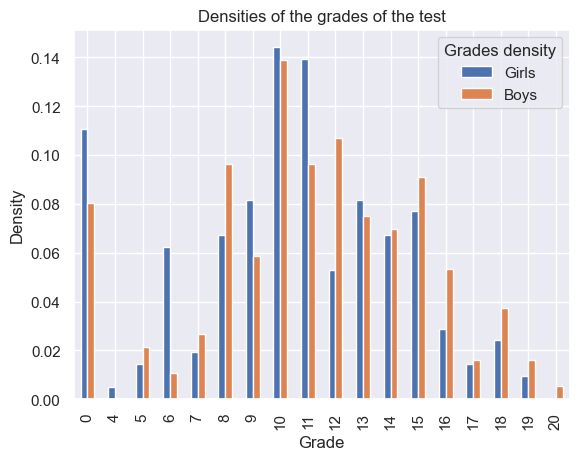

In [20]:
girls_grades = df_3[df_3["sex"] == 'F']["G3"].value_counts()
boys_grades = df_3[df_3["sex"] == 'M']["G3"].value_counts()
df_with_grades = pd.concat([girls_grades / girls_grades.sum(), boys_grades / boys_grades.sum()], axis=1).fillna(0.0)
df_with_grades = df_with_grades.sort_index(axis=0).astype(dtype='float')
ax = df_with_grades.plot.bar()
ax.legend(title="Grades density", labels=[f"Girls", "Boys"])
plt.title("Densities of the grades of the test")
plt.xlabel("Grade")
plt.ylabel("Density")
plt.show()

Есть выбросы в районе нуля.
Уберём из выборки все оценки, равные нулю, и посмотрим на получившееся распределение выборок:

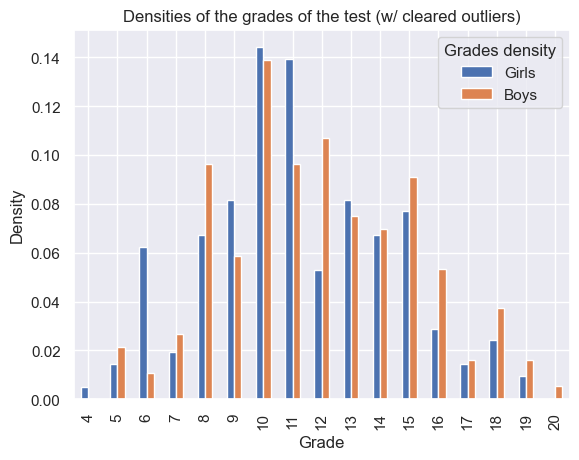

In [21]:
ax = df_with_grades.drop(0, axis=0).plot.bar()
# df_with_grades.transpose().plot.density(ax=ax)
ax.legend(title="Grades density", labels=[f"Girls", "Boys"])
plt.title("Densities of the grades of the test (w/ cleared outliers)")
plt.xlabel("Grade")
plt.ylabel("Density")
plt.show()
plt.show()

Вполне нормально.

### **3.2.** Проверим гипотезу о равенстве средних баллов среди мальчиков и девочек:

Пусть $X_i$ - выборка оценок мальчиков, $Y_i$ - выборка оценок девочек.

Проверим гипотезу:
- $H_0: \mathbb{E}X_i = \mathbb{E}Y_i$
- $H_1: \mathbb{E}X_i \neq \mathbb{E}Y_i$

на уровне значимости $\alpha = 0.05$

#### Проверка гипотезы:

Возьмём наши выборки, очистим их от нулей (от выбросов, про которые мы говорили ранее).

In [22]:
df_boys_cleaned = df_3[(df_3["sex"] == 'M') & (df_3["G3"] != 0)]["G3"].astype(dtype='float')
df_girls_cleaned = df_3[(df_3["sex"] == 'F') & (df_3["G3"] != 0)]["G3"].astype(dtype='float')

Проведём t-тест для определения равенства матожиданий распределения оценок мальчиков и девочек:

In [23]:
print("P-value is:", ttest_ind(df_boys_cleaned, df_girls_cleaned).pvalue)
print("Significance level is:", ALPHA)

P-value is: 0.0531131748457915
Significance level is: 0.05


P-value выше уровня значимости (0.05), значит, мы принимаем гипотезу.

#### Выводы:

Оценка не определяется полом, а предрасположенностью к точным наукам и усилиями, затраченными на учёбу.

### **3.2.1.** Доказательство t-теста при верной нулевой гипотезе:

Пусть $X_i \sim \mathcal{N}(\mu_1, \sigma^2), Y_j \sim \mathcal{N}(\mu_2, \sigma^2)$, и мы считаем, что нулевая гипотеза верна, т.е. $\mu_1 = \mu_2 = \mu$. Пусть у нас $n$ элементов из $X$ и $m$ элементов из $Y$.

Тогда мы знаем, что:
- $\overline{X} \sim \mathcal{N}\left(\mu, \frac{\sigma^2}{n}\right), \overline{Y} \sim \mathcal{N}\left(\mu, \frac{\sigma^2}{m}\right) \implies \Delta = \overline{X} - \overline{Y} \sim \mathcal{N}\left(\mu, \frac{\sigma^2}{n} + \frac{\sigma^2}{m}\right)$
- $\hat{\sigma}_X^2 = \sigma^2(n - 1)^{-1}\sigma_X^2$, где $\sigma_X^2 \sim \chi^2(n-1)$; $\hat{\sigma}_Y^2 = \sigma^2(m - 1)^{-1}\sigma_Y^2$, где $\sigma_Y^2 \sim \chi^2(m-1)$

Значит,

$$\frac{\Delta}{\sqrt{\frac{\sigma^2}{n} + \frac{\sigma^2}{m}}} = \eta \sim \mathcal{N}(0, 1)$$

Заметим, что тогда $$\frac{(n-1)\hat{\sigma}_X^2 + (m-1)\hat{\sigma}_Y^2}{m + n - 2} = \sigma^2 \frac{\sigma_X^2 + \sigma_Y^2}{m + n - 2} = \sigma^2 \frac{\xi}{m + n - 2}, \text{ где } \xi \sim \chi^2(m + n - 2)$$

Перепишем данное нам выражение:

$$\frac{\Delta}{s_{X, Y}\sqrt{\frac{1}{n} + \frac{1}{m}}} = \sqrt{\frac{m + n - 2}{(n-1)\hat{\sigma}_X^2 + (m-1)\hat{\sigma}_Y^2}} \frac{\Delta}{\sqrt{\frac{\sigma^2}{n} + \frac{\sigma^2}{m}}} = \frac{\eta}{\sqrt{\frac{\xi}{m + n - 2}}} \sim t(m + n - 2) (\text{т.к. }\eta \sim \mathcal{N}(0, 1), \xi \sim \chi^2(m + n - 2))$$

Значит, при верности нулевой гипотезы данная статистика распределена согласно t-распределению Стьюдента с $(m + n - 2)$ степенями свободы.

Доказано.